In [7]:
#aux
import os
import json

# Data
import numpy as np
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns

#avoid all the user warnings from pandas
import warnings
import itertools
warnings.filterwarnings('ignore')


In [14]:
# get all the jsons from a folder, read them into a dataframe and concatenate them
path = r'../metrics/'
all_files = os.listdir(path)
li = []
for filename in all_files:
    with open(os.path.join(path, filename)) as f:
        data = json.load(f)
        li.append(pd.DataFrame(data))
df = pd.concat(li, axis=0, ignore_index=True)

# Open the metrics dictionary and add it to the dataframe
df = df.join(pd.DataFrame(df['metrics'].tolist()))

df.head()

,dataset,method,k,ml_algorithm,metrics,dataset_size,classification_report,micro_f1,macro_f1,RMSE,ROCAUC
0,cmc,topdown,12.0,xgboost,{'classification_report': {'0': {'precision': ...,1473,"{'0': {'precision': 0.618421052631579, 'recall...",0.572881,0.538323,NaN,NaN
1,cmc,topdown,12.0,randomforest,{'classification_report': {'0': {'precision': ...,1473,"{'0': {'precision': 0.6375838926174496, 'recal...",0.600000,0.571701,NaN,NaN
2,cmc,topdown,7.0,xgboost,{'classification_report': {'0': {'precision': ...,1473,"{'0': {'precision': 0.6304347826086957, 'recal...",0.572881,0.548904,NaN,NaN
3,cmc,topdown,7.0,randomforest,{'classification_report': {'0': {'precision': ...,1473,"{'0': {'precision': 0.6744186046511628, 'recal...",0.583051,0.562671,NaN,NaN
4,cmc,topdown,53.0,xgboost,{'classification_report': {'0': {'precision': ...,1473,"{'0': {'precision': 0.6, 'recall': 0.661417322...",0.572881,0.558562,NaN,NaN


In [15]:
# Round K for plots
df['k'] = np.round(df['k'].astype(float), 2)
# Rename modnrian to basic_mondrian for more clarity
df.loc[df['method'] == 'mondrian', 'method'] = 'basic_mondrian'


In [19]:
# Plot the performance of the algorithms for each dataset
def plot_dataset_performance(metrics_df,
                             normalize_k=False,
                             exclude_topdown=True):
    DATASET_NAMES= ['adult','cahousing','cmc']
    METRICS_LIST = ['ROCAUC','RMSE','macro_f1']
    normalized_text = ''

    iterations=list(itertools.product(zip(DATASET_NAMES,METRICS_LIST),['xgboost','randomforest']))

    plt.figure(figsize=(50,70))
    for n,iteration in enumerate(iterations):
        dataset = iteration[0][0]
        metric = iteration[0][1]
        algorithm = iteration[1]
        print(dataset,metric,algorithm)
        df = metrics_df[metrics_df['dataset'] == dataset]

        if exclude_topdown:
            df = df[df['method'] != 'topdown']

        if normalize_k is True:
            df['k'] = df['k']/df['dataset_size']
            normalized_text = '_normalized'
            print(df['k'].max()*100)

        ax = plt.subplot(3,2,n+1)
        # plot the random forest performance
        sns.lineplot(data=df[(df['ml_algorithm'] == algorithm) & (df['method'] != 'no_anonimization')],
                     x='k',
                     y=metric,
                     hue='method'
                     )

        ax.set_title(f'{dataset} - {algorithm}',size=64)
        ax.set_xlabel('k',size=42)
        ax.set_ylabel(metric,size=42)
        ax.tick_params(labelsize=42)

        #plot a horizontal line for the random forest performance with no anonimization
        ax.axhline(df[(df['ml_algorithm'] == algorithm) & (df['method'] == 'no_anonimization')][metric].values[0],
                    color='red',
                    linestyle='--',
                    label='no anonimization baseline')
        ax.get_legend().remove()
    #add a global legend
    plt.figlegend(*ax.get_legend_handles_labels(), loc='upper center', ncol=5, fontsize=48)
    plt.savefig(f'curves{normalized_text}.png')

adult ROCAUC xgboost
adult ROCAUC randomforest
cahousing RMSE xgboost
cahousing RMSE randomforest
cmc macro_f1 xgboost
cmc macro_f1 randomforest
adult ROCAUC xgboost
0.3071158748195694
adult ROCAUC randomforest
0.3071158748195694
cahousing RMSE xgboost
0.4844961240310077
cahousing RMSE randomforest
0.4844961240310077
cmc macro_f1 xgboost
6.788866259334691
cmc macro_f1 randomforest
6.788866259334691


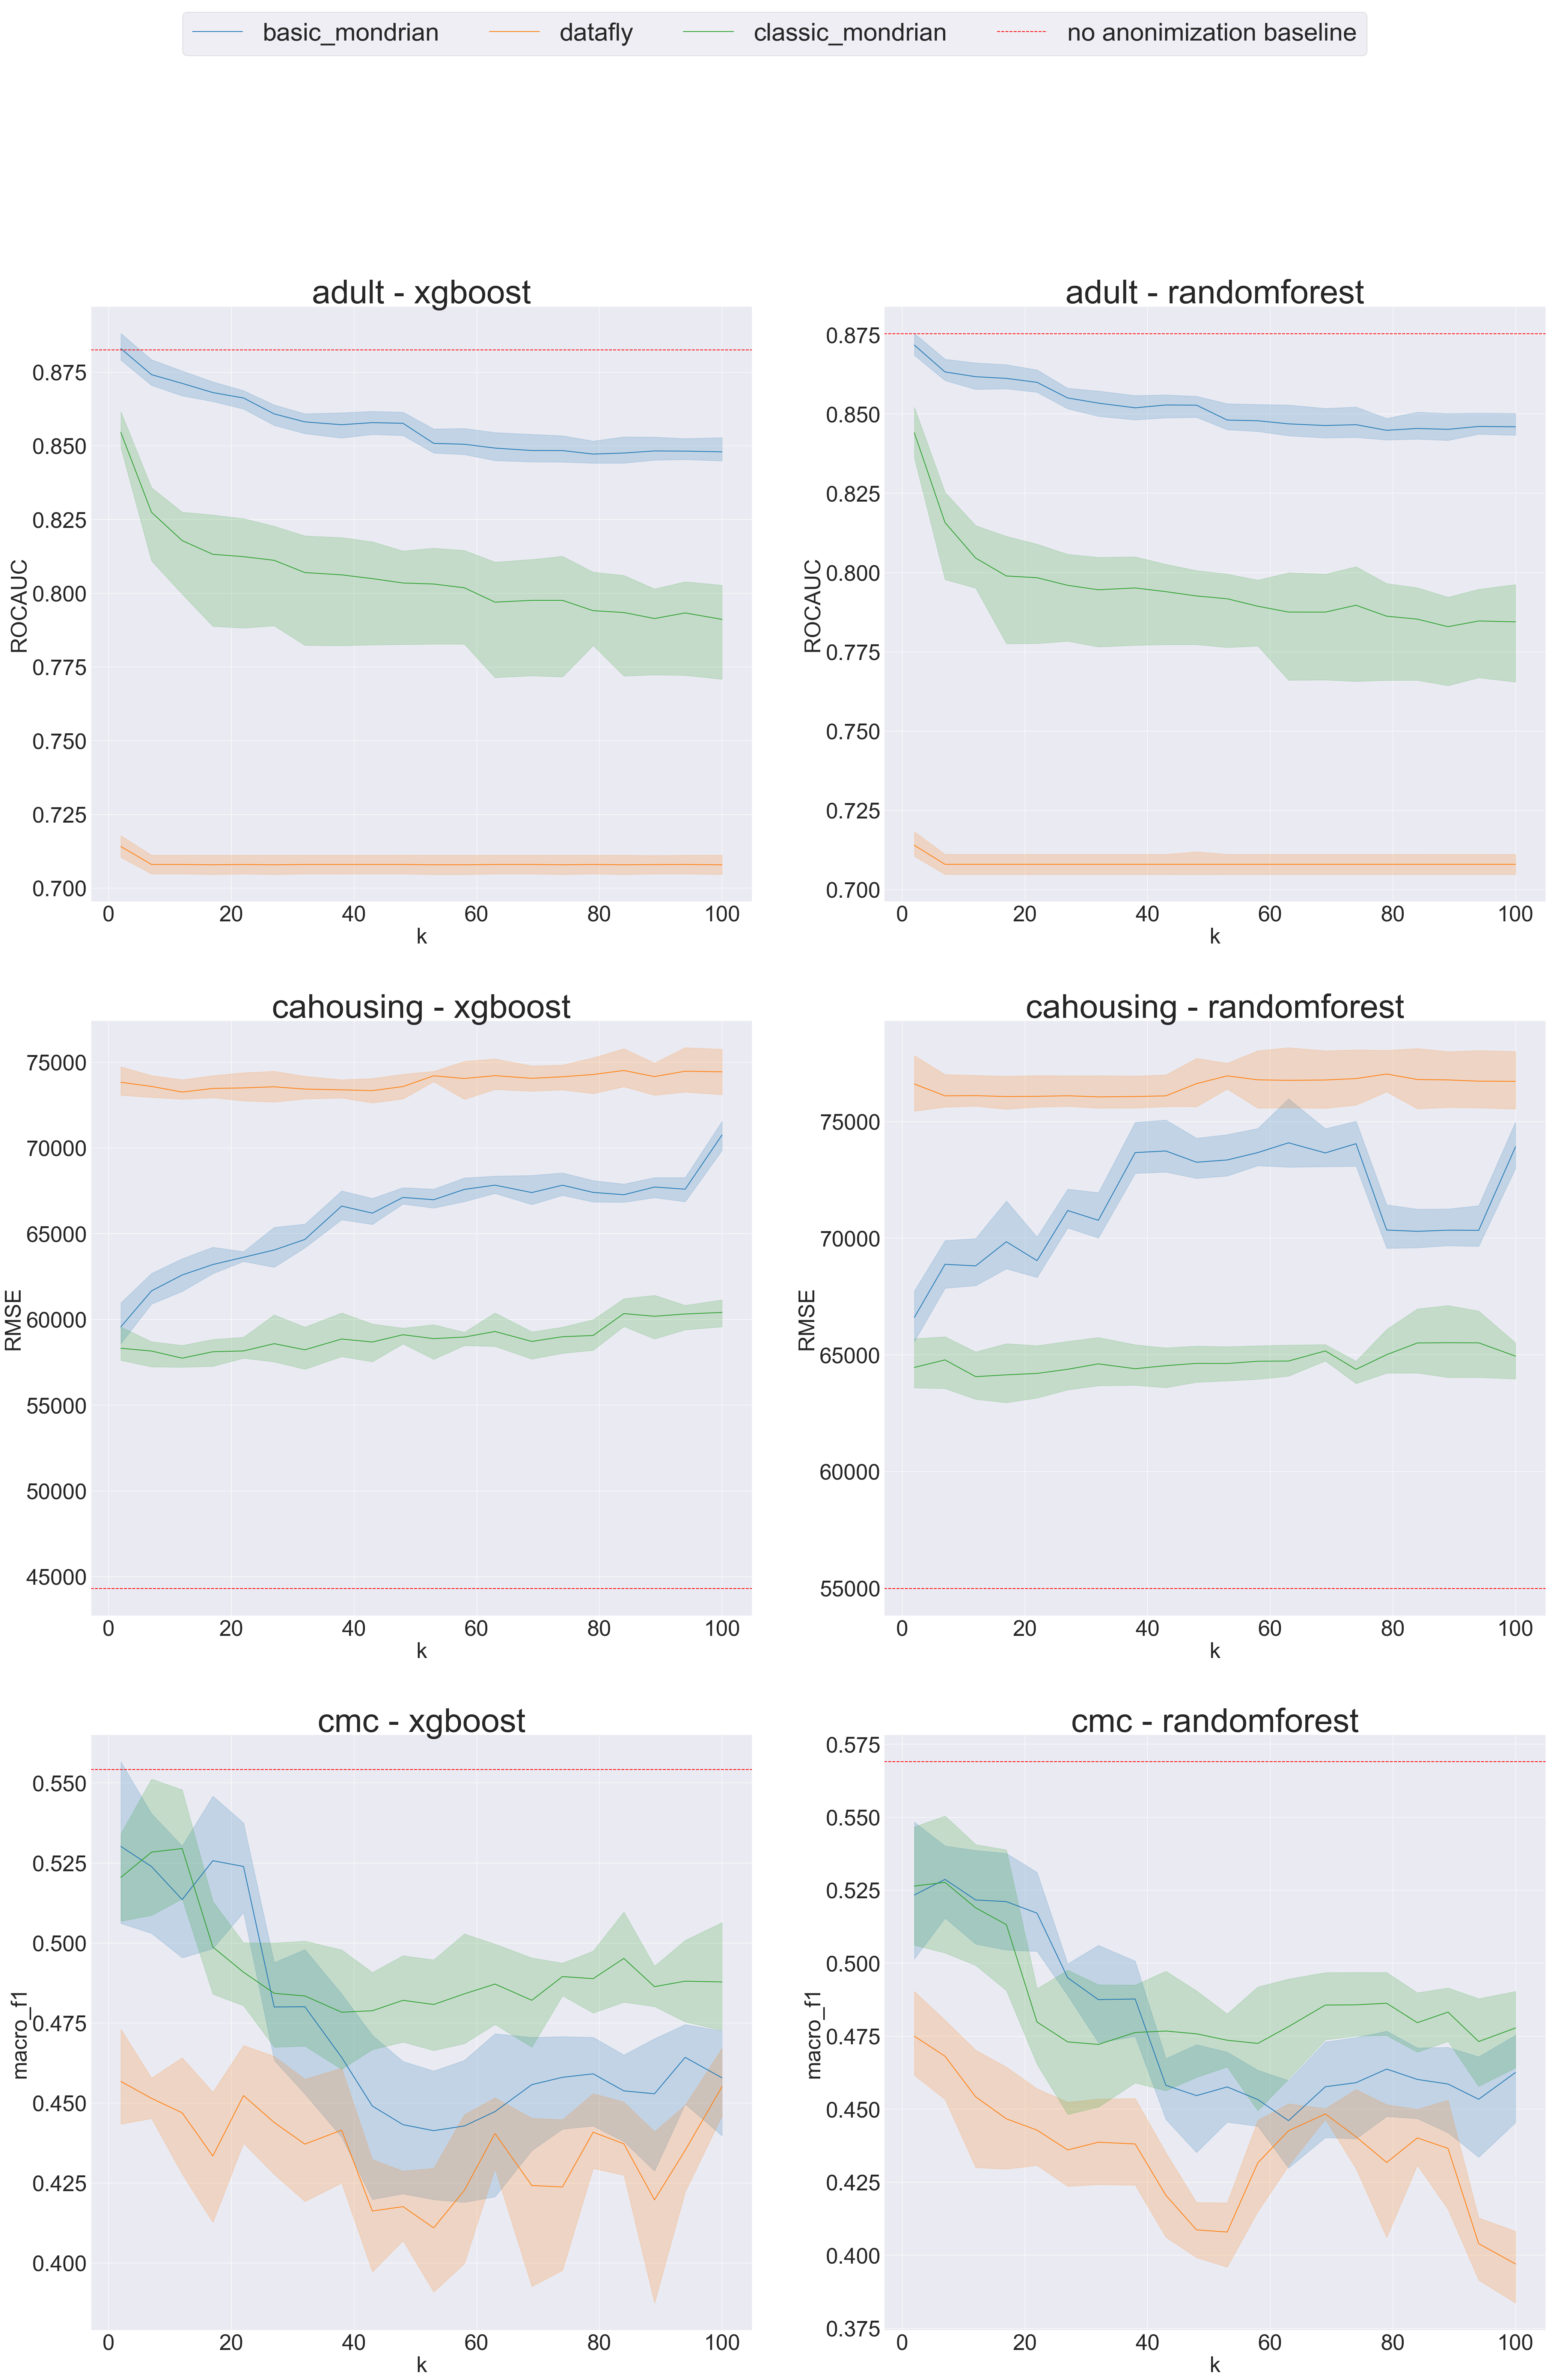

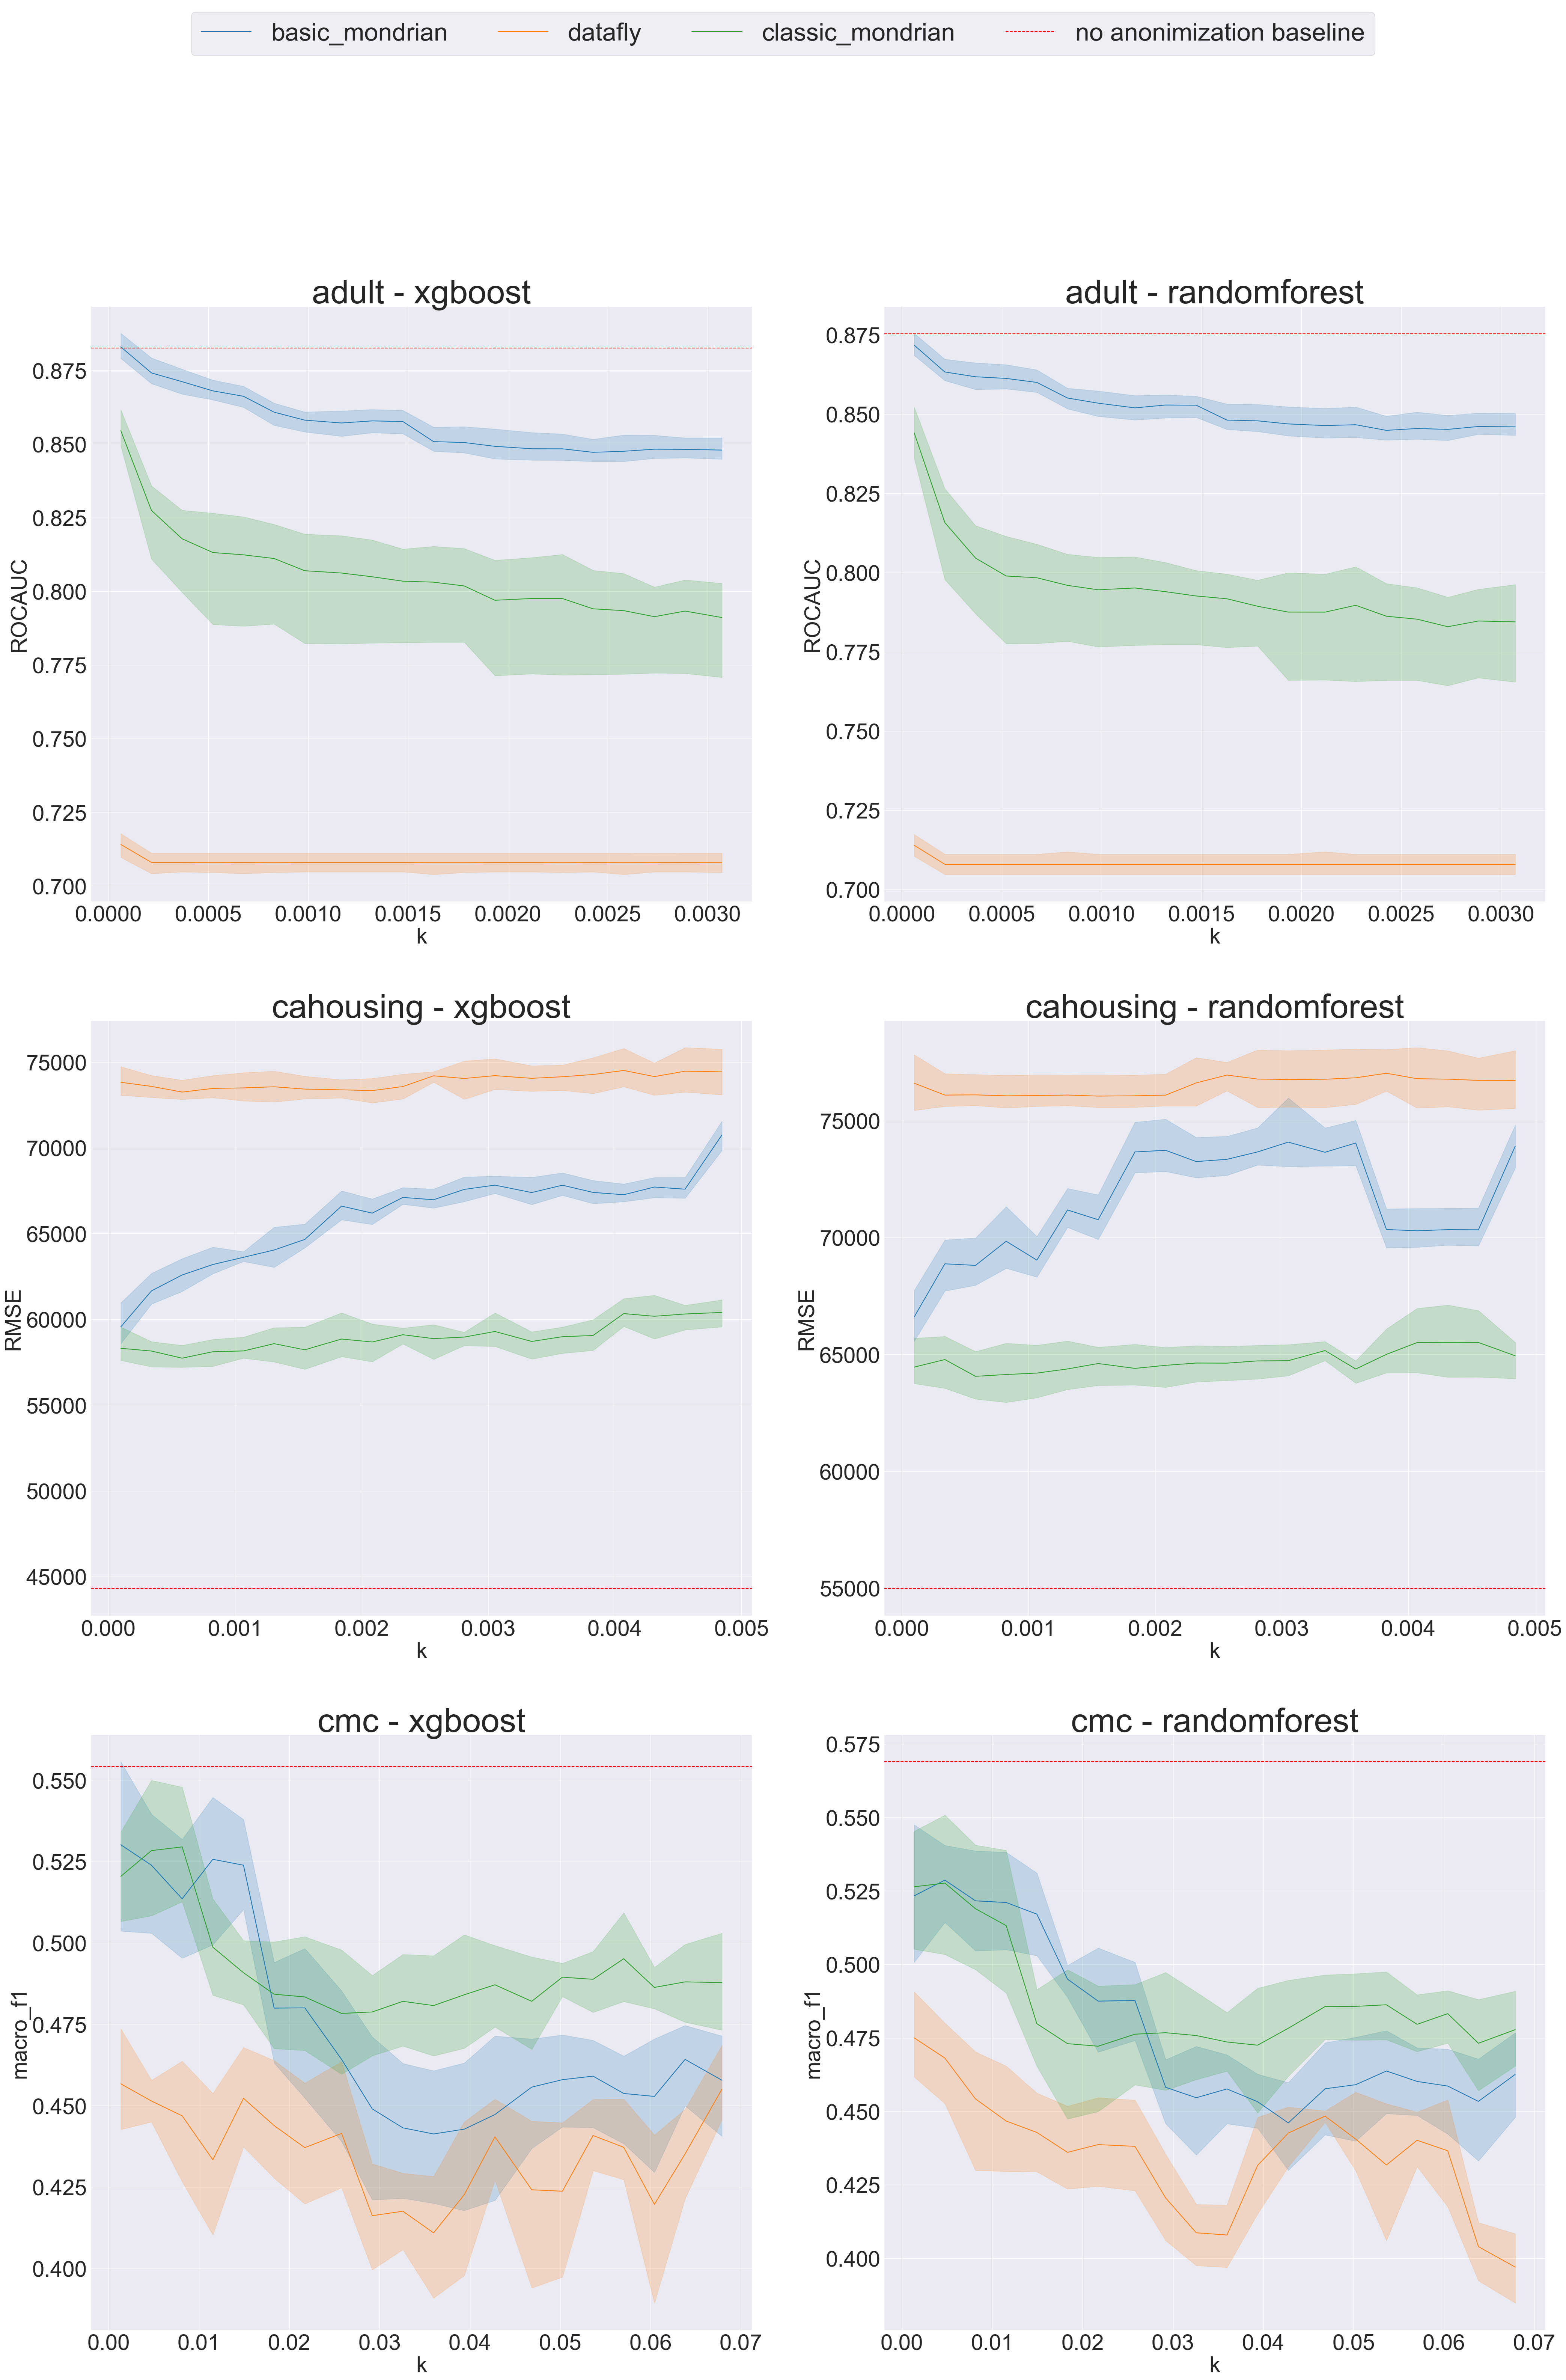

In [20]:
plot_dataset_performance(df)
plot_dataset_performance(df,True)
# add 1 to x


In [ ]:
#add

In [ ]:
sd